In [223]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import albumentations as A
import cv2
import torch
import glob

In [313]:
def read_image(path):
    '''
    Reads the image using CV library

    '''
    img =  cv2.imread(path)
    if img is None:
        raise FileNotFoundError(path)
    return img

def plot():
    fig,ax = plt.subplots(1,2,figsize=(20,9))

    ax[0].imshow(high)
    ax[0].axis('off')
    ax[1].imshow(low)
    ax[1].axis('off')


    plt.show()

In [361]:
path = glob.glob('data/Submission data/*')
transforms = A.Compose([
    A.MultiplicativeNoise(p=0.5),
    A.HistogramMatching(path,blend_ratio=(0.95,0.98),always_apply=True,p=1),
    
])

In [362]:
low = cv2.cvtColor(read_image('Validation_Post_Event_001.jpg').astype(np.uint8), cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(read_image('tile_7_4.jpg').astype(np.uint8), cv2.COLOR_BGR2RGB)
high = transforms(image=img)['image']




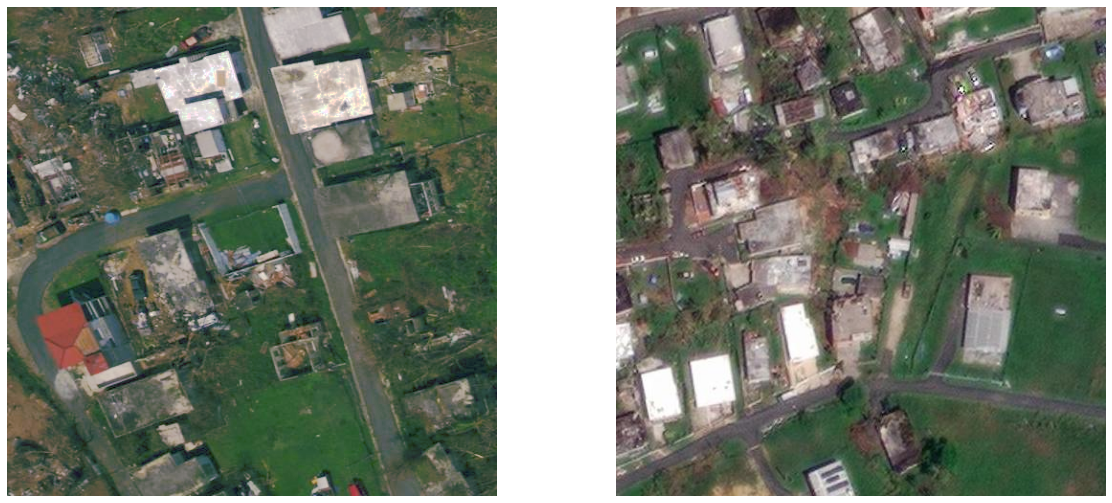

In [363]:
plot()

In [364]:
import os

In [373]:
label_list = os.listdir('data/train/post/label/')
img_list = [i.replace('.json','.jpg') for i in label_list]

In [375]:
for i in img_list:
    os.rename('data/Post_Event_Grids_In_JPEG/'+i,'data/train/post/img/'+i)